## **Challenge:** <font color="blue">to predict arrival delays of commercial flights. </font>
Often, there isn't much airlines can do to avoid the delays, therefore, they play an important role in both profits and loss of the airlines. It is critical for airlines to estimate flight delays as accurate as possible because the results can be applied to both, improvements in customer satisfaction and income of airline agencies.

### Content:
* Dataset itroduction
* Assumptions
* Questions
* Exploratory Data Analysis
* Dealing with class imbalance
* Training and testing of various models performance
* Conclusions



____________________
## Dataset introduction

The data is originally from a [url description](https://www.kaggle.com/mlg-ulb/creditcardfraud).
Downloaded from [here](https://drive.google.com/file/d/1FCQY1SiWIjh_ME6Wtb3FG8Y1sKoRwAUc/view?usp=sharing). 

<i><font color="red"></font></i><i><font color="red">Introduction</font></i>

____________________
## Assumptions

Asssumptions

____________________
## Questions

Which features seem to be the most important? Test hypothesis

## Exploratory Data Analysis

In [1]:
#Importing required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In this challenge, we will try to predict credit card fraud.

Download the data from [here](https://drive.google.com/file/d/1FCQY1SiWIjh_ME6Wtb3FG8Y1sKoRwAUc/view?usp=sharing). The data is originally from a [Kaggle Competition](https://www.kaggle.com/mlg-ulb/creditcardfraud).

In [2]:
import psycopg2
from psycopg2 import Error

try:
    # Connect to an existing database
    connection = psycopg2.connect(user="lhl_student",
                                  password="lhl_student",
                                  host="mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com",
                                  port="5432",
                                  database="mid_term_project")

    # Create a cursor to perform database operations
    cursor = connection.cursor()
    # Print PostgreSQL details
    print("PostgreSQL server information")
    print(connection.get_dsn_parameters(), "\n")
    # Executing a SQL query
    cursor.execute("SELECT * from flights limit 100")
    #list_tables = cursor.fetchall()
    #print(list_tables)
    
    # Fetch result
    #list_tables = cursor.fetchall()
    #print(list_tables)
    #record = cursor.fetchnone()
    #print("You are connected to - ", record, "\n")

except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)
finally:
    if (connection):
        cursor.close()
        connection.close()
        print("PostgreSQL connection is closed")

PostgreSQL server information
{'user': 'lhl_student', 'channel_binding': 'prefer', 'dbname': 'mid_term_project', 'host': 'mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'ssl_min_protocol_version': 'TLSv1.2', 'gssencmode': 'prefer', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'} 

PostgreSQL connection is closed


In [3]:
def postgresql_to_dataframe(conn, select_query, column_names):
    """
    Tranform a SELECT query into a pandas dataframe
    """
    cursor = conn.cursor()
    try:
        cursor.execute(select_query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    
    # Naturally we get a list of tupples
    tupples = cursor.fetchall()
    cursor.close()
    
    # We just need to turn it into a pandas dataframe
    df = pd.DataFrame(tupples, columns=column_names)
    return df
    df.head()

In [4]:
#SELECT * FROM flights order by random() limit 10000

In [5]:
#df1 = pd.read_csv(r'flights.csv')
df1 = pd.read_csv(r'random_10000.csv')
df1['fl_date'] = pd.to_datetime(df1['fl_date'])
df1['year'] = df1['fl_date'].dt.year
df1['month'] = df1['fl_date'].dt.month
df1.describe()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,year,month
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9794.000000,9794.000000,9784.000000,9784.000000,9779.000000,...,1873.000000,1873.000000,1873.000000,1873.000000,65.000000,65.000000,65.000000,0.0,10000.000000,10000.000000
mean,2733.377800,2733.377800,12652.309300,12678.647900,1332.445600,1337.758117,10.585154,17.552637,1362.432441,1456.202372,...,2.875601,18.359851,0.057128,27.910304,1306.830769,37.984615,37.984615,NaN,2018.506000,6.538200
std,1860.082576,1860.082576,1521.471189,1523.860284,490.702818,504.773419,46.795677,10.003847,506.374402,536.387426,...,26.684630,41.319163,1.067409,50.061100,419.598006,31.552779,31.552779,NaN,0.499989,3.379805
min,1.000000,1.000000,10135.000000,10135.000000,5.000000,1.000000,-24.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,533.000000,1.000000,1.000000,NaN,2018.000000,1.000000
25%,1102.000000,1102.000000,11292.000000,11292.000000,915.000000,918.000000,-6.000000,11.000000,933.750000,1039.500000,...,0.000000,0.000000,0.000000,0.000000,956.000000,19.000000,19.000000,NaN,2018.000000,4.000000
50%,2318.500000,2318.500000,12889.000000,12889.000000,1326.000000,1333.000000,-2.000000,15.000000,1347.000000,1500.000000,...,0.000000,4.000000,0.000000,5.000000,1308.000000,28.000000,28.000000,NaN,2019.000000,7.000000
75%,4324.000000,4324.000000,14057.000000,14057.000000,1735.000000,1744.750000,7.000000,21.000000,1800.250000,1907.500000,...,0.000000,20.000000,0.000000,35.000000,1653.000000,46.000000,46.000000,NaN,2019.000000,9.000000
max,7438.000000,7438.000000,16218.000000,16218.000000,2359.000000,2400.000000,1233.000000,147.000000,2359.000000,2400.000000,...,933.000000,686.000000,30.000000,446.000000,2110.000000,171.000000,171.000000,NaN,2019.000000,12.000000


In [6]:
df1.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,year,month
0,2018-07-29,UA,UA_CODESHARE,UA,3457,YX,N639RW,3457,11413,DRO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,7
1,2018-02-04,AA,AA,AA,2646,AA,N920NN,2646,10423,AUS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,2
2,2019-03-16,AA,AA_CODESHARE,AA,4824,PT,N690AE,4824,11042,CLE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,3
3,2018-02-25,DL,DL_CODESHARE,DL,3553,OO,N433SW,3553,13930,ORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,2
4,2019-03-19,WN,WN,WN,727,WN,N7842A,727,11433,DTW,...,0.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,2019,3


In [7]:
# Dealing with missing data
total = df1.isnull().sum().sort_values(ascending=False)
print(total)

no_name                10000
longest_add_gtime       9935
total_add_gtime         9935
first_dep_time          9935
cancellation_code       9788
late_aircraft_delay     8127
security_delay          8127
nas_delay               8127
weather_delay           8127
carrier_delay           8127
air_time                 242
arr_delay                239
actual_elapsed_time      238
wheels_on                221
taxi_in                  221
arr_time                 217
taxi_out                 216
wheels_off               216
dep_delay                206
dep_time                 206
tail_num                  43
flights                    0
dup                        0
year                       0
crs_elapsed_time           0
distance                   0
fl_date                    0
diverted                   0
origin                     0
branded_code_share         0
mkt_carrier                0
mkt_carrier_fl_num         0
op_unique_carrier          0
op_carrier_fl_num          0
origin_airport

In [8]:
df1.dtypes

fl_date                datetime64[ns]
mkt_unique_carrier             object
branded_code_share             object
mkt_carrier                    object
mkt_carrier_fl_num              int64
op_unique_carrier              object
tail_num                       object
op_carrier_fl_num               int64
origin_airport_id               int64
origin                         object
origin_city_name               object
dest_airport_id                 int64
dest                           object
dest_city_name                 object
crs_dep_time                    int64
dep_time                      float64
dep_delay                     float64
taxi_out                      float64
wheels_off                    float64
wheels_on                     float64
taxi_in                       float64
crs_arr_time                    int64
arr_time                      float64
arr_delay                     float64
cancelled                       int64
cancellation_code              object
diverted    

In [9]:
df1['fl_date'] = pd.to_datetime(df1['fl_date'])

In [10]:
df1

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,year,month
0,2018-07-29,UA,UA_CODESHARE,UA,3457,YX,N639RW,3457,11413,DRO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,7
1,2018-02-04,AA,AA,AA,2646,AA,N920NN,2646,10423,AUS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,2
2,2019-03-16,AA,AA_CODESHARE,AA,4824,PT,N690AE,4824,11042,CLE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,3
3,2018-02-25,DL,DL_CODESHARE,DL,3553,OO,N433SW,3553,13930,ORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,2
4,2019-03-19,WN,WN,WN,727,WN,N7842A,727,11433,DTW,...,0.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,2019,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-11-15,WN,WN,WN,1593,WN,N7707C,1593,11259,DAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,11
9996,2018-10-29,UA,UA,UA,717,UA,N37502,717,12892,LAX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,10
9997,2019-09-27,NK,NK,NK,624,NK,N684NK,624,11292,DEN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,9
9998,2018-06-07,AS,AS,AS,259,AS,N323AS,259,14831,SJC,...,0.0,19.0,0.0,0.0,NaN,NaN,NaN,NaN,2018,6


In [11]:
from pycaret.classification import *

In [12]:
df1=df1.fillna(0)

In [13]:
delay_cols = [col for col in df1.columns if 'delay' in col]
delay_cols=['fl_date']+['month']+['year']+['origin_airport_id']+['origin']+['cancelled']+delay_cols
df_delay=df1[delay_cols]
df_delay.head()

,fl_date,month,year,origin_airport_id,origin,cancelled,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-07-29,7,2018,11413,DRO,0,-7.0,-3.0,0.0,0.0,0.0,0.0,0.0
1,2018-02-04,2,2018,10423,AUS,0,-5.0,-19.0,0.0,0.0,0.0,0.0,0.0
2,2019-03-16,3,2019,11042,CLE,0,-8.0,-22.0,0.0,0.0,0.0,0.0,0.0
3,2018-02-25,2,2018,13930,ORD,0,-3.0,-9.0,0.0,0.0,0.0,0.0,0.0
4,2019-03-19,3,2019,11433,DTW,0,12.0,16.0,12.0,0.0,4.0,0.0,0.0


In [14]:
df_delay.describe()

,month,year,origin_airport_id,cancelled,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,6.538200,2018.506000,12652.309300,0.021200,10.367100,5.465200,3.634700,0.538600,3.43880,0.010700,5.227600
std,3.379805,0.499989,1521.471189,0.144058,46.335527,48.708784,28.529775,11.600499,19.26004,0.462393,24.244162
min,1.000000,2018.000000,10135.000000,0.000000,-24.000000,-61.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,4.000000,2018.000000,11292.000000,0.000000,-6.000000,-15.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,7.000000,2019.000000,12889.000000,0.000000,-2.000000,-6.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,9.000000,2019.000000,14057.000000,0.000000,6.000000,7.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,12.000000,2019.000000,16218.000000,1.000000,1233.000000,1225.000000,1225.000000,933.000000,686.00000,30.000000,446.000000


In [15]:
df_delay['sum_delays']=df_delay['carrier_delay']+df_delay['weather_delay']+df_delay['nas_delay']+df_delay['security_delay']+df_delay['late_aircraft_delay']
df_delay['checking_diff_delays_arr']=df_delay['arr_delay']-df_delay['sum_delays']
df_delay['cancelled'].unique().tolist()
del_count=df_delay[df_delay.cancelled == 1].count()
del_count

fl_date                     212
month                       212
year                        212
origin_airport_id           212
origin                      212
cancelled                   212
dep_delay                   212
arr_delay                   212
carrier_delay               212
weather_delay               212
nas_delay                   212
security_delay              212
late_aircraft_delay         212
sum_delays                  212
checking_diff_delays_arr    212
dtype: int64

In [16]:
df_delay.describe()

,month,year,origin_airport_id,cancelled,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,sum_delays,checking_diff_delays_arr
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.538200,2018.506000,12652.309300,0.021200,10.367100,5.465200,3.634700,0.538600,3.43880,0.010700,5.227600,12.850400,-7.385200
std,3.379805,0.499989,1521.471189,0.144058,46.335527,48.708784,28.529775,11.600499,19.26004,0.462393,24.244162,45.493654,10.632428
min,1.000000,2018.000000,10135.000000,0.000000,-24.000000,-61.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-61.000000
25%,4.000000,2018.000000,11292.000000,0.000000,-6.000000,-15.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-15.000000
50%,7.000000,2019.000000,12889.000000,0.000000,-2.000000,-6.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-6.000000
75%,9.000000,2019.000000,14057.000000,0.000000,6.000000,7.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,12.000000,2019.000000,16218.000000,1.000000,1233.000000,1225.000000,1225.000000,933.000000,686.00000,30.000000,446.000000,1225.000000,14.000000


In [17]:
df_zero_delay_airport=df_delay[df_delay.sum_delays == 0]
# initialize setup
#from pycaret.regression import *
#s = setup(df_delay_airport, target = 'arr_delay')

In [18]:
df_zero_delay_airport.describe()


,month,year,origin_airport_id,cancelled,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,sum_delays,checking_diff_delays_arr
count,8127.000000,8127.000000,8127.000000,8127.000000,8127.000000,8127.000000,8127.0,8127.0,8127.0,8127.0,8127.0,8127.0,8127.000000
mean,6.551741,2018.508183,12666.429556,0.026086,-1.918789,-9.087240,0.0,0.0,0.0,0.0,0.0,0.0,-9.087240
std,3.389622,0.499964,1527.722451,0.159401,8.145855,11.119211,0.0,0.0,0.0,0.0,0.0,0.0,11.119211
min,1.000000,2018.000000,10135.000000,0.000000,-24.000000,-61.000000,0.0,0.0,0.0,0.0,0.0,0.0,-61.000000
25%,4.000000,2018.000000,11292.000000,0.000000,-6.000000,-16.000000,0.0,0.0,0.0,0.0,0.0,0.0,-16.000000
50%,7.000000,2019.000000,12889.000000,0.000000,-3.000000,-9.000000,0.0,0.0,0.0,0.0,0.0,0.0,-9.000000
75%,9.000000,2019.000000,14057.000000,0.000000,0.000000,-1.000000,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000
max,12.000000,2019.000000,16218.000000,1.000000,174.000000,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,14.000000


In [19]:
df_zero_delay_airport_arr_delay_positive=df_zero_delay_airport[df_zero_delay_airport.arr_delay > 0]
df_zero_delay_airport_arr_delay_positive

,fl_date,month,year,origin_airport_id,origin,cancelled,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,sum_delays,checking_diff_delays_arr
11,2018-10-23,10,2018,11278,DCA,0,-9.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
25,2018-03-02,3,2018,10397,ATL,0,9.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
32,2018-02-26,2,2018,14771,SFO,0,28.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
37,2018-02-23,2,2018,14683,SAT,0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
38,2018-03-26,3,2018,12889,LAS,0,11.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,2019-02-06,2,2019,13871,OMA,0,-2.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
9980,2019-07-03,7,2019,10397,ATL,0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
9984,2019-07-17,7,2019,11298,DFW,0,19.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
9985,2019-10-03,10,2019,14100,PHL,0,-10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [24]:
df_delay_dep=df_delay[df_delay.sum_delays != 0]
#df_delay_dep
target_df=pd.DataFrame(df_delay_dep['arr_delay'])
target_df

,arr_delay
4,16.0
5,24.0
9,130.0
15,47.0
24,15.0
...,...
9974,27.0
9977,145.0
9982,23.0
9992,83.0


In [28]:
df_delay_dep.head()
df_delay_dep = df_delay_dep.drop(['arr_delay'], axis=1)
df_delay_dep.head()

,fl_date,month,year,origin_airport_id,origin,cancelled,dep_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,sum_delays,checking_diff_delays_arr
4,2019-03-19,3,2019,11433,DTW,0,12.0,12.0,0.0,4.0,0.0,0.0,16.0,0.0
5,2019-10-22,10,2019,12339,IND,0,36.0,0.0,0.0,0.0,0.0,24.0,24.0,0.0
9,2019-08-13,8,2019,14492,RDU,0,153.0,0.0,0.0,0.0,0.0,130.0,130.0,0.0
15,2019-04-04,4,2019,13198,MCI,0,62.0,0.0,0.0,0.0,0.0,47.0,47.0,0.0
24,2018-11-26,11,2018,14107,PHX,0,10.0,10.0,0.0,5.0,0.0,0.0,15.0,0.0


In [30]:
import numpy as np
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_delay_dep, target_df, test_size=0.3, random_state=42)


In [40]:
X_train.head()
X_train.describe()
y_test.describe()

,arr_delay
count,562.000000
mean,69.758007
std,79.896603
min,15.000000
25%,24.000000
50%,43.000000
75%,81.500000
max,701.000000


In [35]:
y_train.describe()

,arr_delay
count,1311.000000
mean,68.115942
std,87.139935
min,15.000000
25%,24.000000
50%,41.000000
75%,82.000000
max,1225.000000


In [44]:
print("Q-ty of arrival delays that are caused by delays in the airport:", df_delay_airport.shape[0])
print("Q-ty of arrival delays that are caused by departure or/and in-flight delay", df_delay_dep.shape[0])

Q-ty of arrival delays that are caused by delays in the airport: 8127
Q-ty of arrival delays that are caused by departure or/and in-flight delay 1873


In [45]:
df_delay_airport.describe()

,month,year,origin_airport_id,cancelled,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,sum_delays,checking_diff_delays_arr
count,8127.000000,8127.000000,8127.000000,8127.000000,8127.000000,8127.000000,8127.0,8127.0,8127.0,8127.0,8127.0,8127.0,8127.000000
mean,6.551741,2018.508183,12666.429556,0.026086,-1.918789,-9.087240,0.0,0.0,0.0,0.0,0.0,0.0,-9.087240
std,3.389622,0.499964,1527.722451,0.159401,8.145855,11.119211,0.0,0.0,0.0,0.0,0.0,0.0,11.119211
min,1.000000,2018.000000,10135.000000,0.000000,-24.000000,-61.000000,0.0,0.0,0.0,0.0,0.0,0.0,-61.000000
25%,4.000000,2018.000000,11292.000000,0.000000,-6.000000,-16.000000,0.0,0.0,0.0,0.0,0.0,0.0,-16.000000
50%,7.000000,2019.000000,12889.000000,0.000000,-3.000000,-9.000000,0.0,0.0,0.0,0.0,0.0,0.0,-9.000000
75%,9.000000,2019.000000,14057.000000,0.000000,0.000000,-1.000000,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000
max,12.000000,2019.000000,16218.000000,1.000000,174.000000,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,14.000000


In [46]:
df_delay_dep.describe()

,month,year,origin_airport_id,cancelled,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,sum_delays,checking_diff_delays_arr
count,1873.000000,1873.000000,1873.000000,1873.0,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.0
mean,6.479445,2018.496530,12591.041111,0.0,63.675921,68.608649,19.405766,2.875601,18.359851,0.057128,27.910304,68.608649,0.0
std,3.337134,0.500121,1492.899268,0.0,87.641827,85.013505,63.571733,26.684630,41.319163,1.067409,50.061100,85.013505,0.0
min,1.000000,2018.000000,10140.000000,0.0,-16.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.0
25%,4.000000,2018.000000,11292.000000,0.0,17.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.0
50%,6.000000,2018.000000,12478.000000,0.0,41.000000,42.000000,0.000000,0.000000,4.000000,0.000000,5.000000,42.000000,0.0
75%,9.000000,2019.000000,13930.000000,0.0,80.000000,82.000000,16.000000,0.000000,20.000000,0.000000,35.000000,82.000000,0.0
max,12.000000,2019.000000,16218.000000,0.0,1233.000000,1225.000000,1225.000000,933.000000,686.000000,30.000000,446.000000,1225.000000,0.0


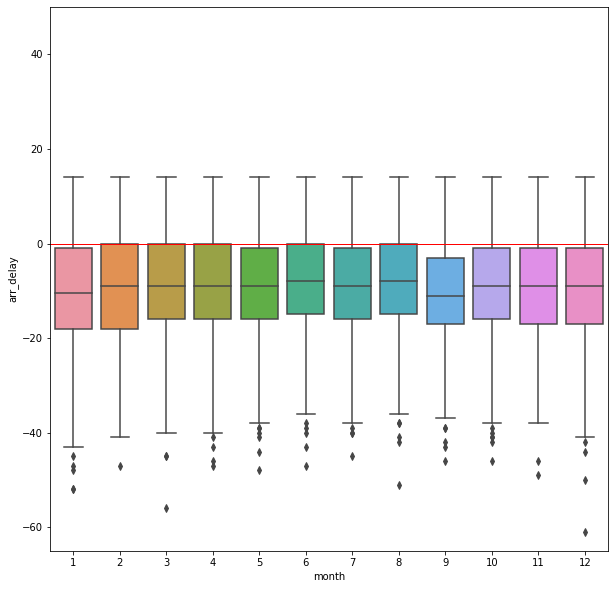

In [47]:
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x="month", y="arr_delay", data=df_delay_airport)
fig.axis(ymin=-65, ymax=50)
plt.xticks(rotation=0);
plt.axhline(linewidth=1, color='r', y=0)

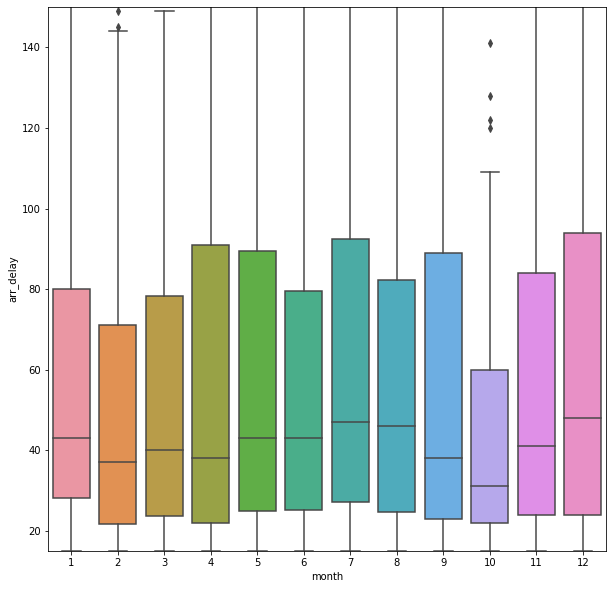

In [48]:
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x="month", y="arr_delay", data=df_delay_dep)
fig.axis(ymin=15, ymax=150)
plt.xticks(rotation=0);
plt.axhline(linewidth=1, color='r', y=0)

In [ ]:
#import the dataset from pycaret repository
from pycaret.datasets import get_data
dset = df_delay_dep
#import regression module
from pycaret.regression import *
#intialize the setup
exp_reg = setup(dset, target = 'arr_delay')

In [ ]:
compare_models()

Conclusion: if the arrival delay is not a sum of of other delays - then the delay is close to 0, with median below zero (table 1)
If one of the airport delays is in place, then arrival delay=sum of airport delays AND the arrival delay is significant

In [52]:
#df3 = df2.dropna()
#df3
df3_nzero_diff_delays1=df3_nzero_diff_delays[(df3_nzero_diff_delays.checking_diff_delays_arr!=0)]
df3_nzero_diff_delays

NameError: name 'df3_nzero_diff_delays' is not defined

In [343]:
1873+8127


10000

In [308]:
10000-8986

1014

In [ ]:
#df_gr=df1.groupby(df1['fl_date'].map(lambda x: x.month))
#df_gr.describe()
#df1['date'] = df1['date'].astype("datetime64")
delay_cols = [col for col in df1.columns if 'delay' in col]
#print(list(df1.columns))
delay_cols=['fl_date']+['month']+['year']+delay_cols
#print(delay_cols)
df_delay=df1[delay_cols]
df_delay

## EDA Findings and conclusions